In [3]:
import pandas as pd

## Convert with `to_datetime`

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html#pandas-to-datetime

+ 2019-12-31
+ 2019-31-12
+ 12-31-2019
+ 12-31-19
+ December 31st 2019
+ 2019/12/31 23:59

...

All of these can be converted to uniform through `to_datetime()` method.

In [4]:
pd.to_datetime("December 31st 2019")

Timestamp('2019-12-31 00:00:00')

In [5]:
pd.to_datetime("12-31-19")

Timestamp('2019-12-31 00:00:00')

In [6]:
pd.to_datetime("12-31-19")

Timestamp('2019-12-31 00:00:00')

What if the date is ambiguous?

In [7]:
pd.to_datetime("10/11/12")

Timestamp('2012-10-11 00:00:00')

In [8]:
pd.to_datetime("10/11/12", dayfirst = True)

Timestamp('2012-11-10 00:00:00')

In [11]:
pd.to_datetime("10/11/12", yearfirst = True)

Timestamp('2010-11-12 00:00:00')

In [12]:
pd.to_datetime("10/11/12", yearfirst = True, dayfirst = True)

Timestamp('2010-12-11 00:00:00')

**format**

+ `%m`: month
+ `%M`: minute
+ `%b`: month in english
+ `%y`: 2 digital year
+ `%Y`: 4 digital year
+ `%d`: 2 digital day

In [15]:
meetings = ["Dec 11 2019 Meeting","Jan 6 2020 Meeting"]

In [16]:
pd.to_datetime(meetings, format = "%b %d %Y Meeting")

DatetimeIndex(['2019-12-11', '2020-01-06'], dtype='datetime64[ns]', freq=None)

In [17]:
ufo = pd.read_csv("data/nuforc_reports.csv")

In [19]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   summary         88095 non-null  object 
 1   city            87888 non-null  object 
 2   state           82890 non-null  object 
 3   date_time       86938 non-null  object 
 4   shape           85627 non-null  object 
 5   duration        84951 non-null  object 
 6   stats           88088 non-null  object 
 7   report_link     88125 non-null  object 
 8   text            88070 non-null  object 
 9   posted          86938 non-null  object 
 10  city_latitude   72013 non-null  float64
 11  city_longitude  72013 non-null  float64
dtypes: float64(2), object(10)
memory usage: 8.1+ MB


In [20]:
pd.to_datetime(ufo["date_time"])

0       2019-12-12 18:43:00
1       2019-03-22 18:30:00
2                       NaT
3       2019-04-17 02:00:00
4       2009-03-15 18:00:00
                ...        
88120   2019-10-02 20:00:00
88121   2019-10-02 20:00:00
88122   2019-10-02 20:03:00
88123   2019-10-02 22:00:00
88124   2019-10-02 22:00:00
Name: date_time, Length: 88125, dtype: datetime64[ns]

In [21]:
ufo["date_time"] = pd.to_datetime(ufo["date_time"])

In [22]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


Another way to transfer to datetime using `parse_dates` when reading files. Then we don't need to replace original data.

In [24]:
pd.read_csv("data/nuforc_reports.csv", parse_dates = ["date_time"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


## Useful dt Properties
https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components

In [27]:
ufo["date_time"].dt.year

0        2019.0
1        2019.0
2           NaN
3        2019.0
4        2009.0
          ...  
88120    2019.0
88121    2019.0
88122    2019.0
88123    2019.0
88124    2019.0
Name: date_time, Length: 88125, dtype: float64

<Axes: xlabel='date_time'>

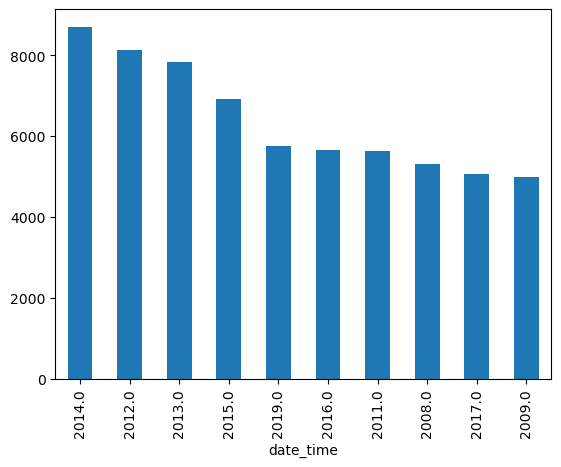

In [28]:
ufo["date_time"].dt.year.value_counts().head(10).plot(kind = "bar")

In [31]:
ufo["date_time"].dt.month.value_counts()

date_time
7.0     10682
8.0      8997
9.0      8498
10.0     8371
6.0      8357
11.0     7596
12.0     6525
5.0      6063
1.0      5979
4.0      5817
3.0      5494
2.0      4559
Name: count, dtype: int64

In [32]:
ufo["date_time"].dt.dayofweek

0        3.0
1        4.0
2        NaN
3        2.0
4        6.0
        ... 
88120    2.0
88121    2.0
88122    2.0
88123    2.0
88124    2.0
Name: date_time, Length: 88125, dtype: float64

## 3. Comparing Dates

In [38]:
ufo[ufo["date_time"] < "1990"]
# comparing years

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
8,Ufos report in Irving Texas at 2200 hrs. On or...,Dallas,TX,1973-07-14 22:00:00,oval,6 minutes,Occurred : 7/14/1973 22:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/145/S145751.html,Ufos report in Irving Texas at 2200 hrs. On o...,2019-04-25T00:00:00,32.835168,-96.808118
15,Strange bright light hovered over mobile home.,Gray Court,SC,1975-07-17 00:00:00,light,5 minutes,Occurred : 7/17/1975 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/147/S147117.html,Strange bright light hovered over mobile home....,2019-07-05T00:00:00,34.578800,-82.114100
31,Bright green round object quickly travelling e...,N. Cascades Nat. Park,WA,1979-07-15 23:00:00,light,2x ~10sec,Occurred : 7/15/1979 23:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/050/S50300.html,Bright green round object quickly travelling e...,2006-05-15T00:00:00,NaN,NaN
54,It was a full moon when my brother and I obser...,Lawrenceburg,KY,1969-06-01 21:00:00,disk,5 minutes,Occurred : 6/1/1969 21:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/049/S49947.html,It was a full moon when my brother and I obser...,2006-05-15T00:00:00,38.005200,-84.983000
55,"UFO over Orangevale, CA in May/June 1969",Orangevale,CA,1969-06-01 23:00:00,unknown,30 to 45 minutes,Occurred : 6/1/1969 23:00 (Entered as : 06/01...,http://www.nuforc.org/webreports/049/S49619.html,"UFO over Orangevale, CA in May/June 1969 My fi...",2006-05-15T00:00:00,38.684500,-121.222300
...,...,...,...,...,...,...,...,...,...,...,...,...
87170,"While trick or treating with Mom, my Grandma p...",Deer Park,OH,1977-10-31 19:00:00,fireball,5 minutes,Occurred : 10/31/1977 19:00 (Entered as : 10/...,http://www.nuforc.org/webreports/149/S149458.html,"While trick or treating with Mom, my Grandma p...",2019-10-04T00:00:00,NaN,NaN
87171,Small UFO with lights and great speed,Trenton,GA,1983-04-01 18:00:00,circle,1 minute,Occurred : 4/1/1983 18:00 (Entered as : 04/01...,http://www.nuforc.org/webreports/149/S149308.html,Small UFO with lights and great speed I was 6 ...,2019-10-04T00:00:00,34.896700,-85.520600
87172,"UFO, 1985 Bridgewater Mass, two eye witnesses ...",Bridgewater,MA,1985-08-09 20:30:00,unknown,5 minutes,Occurred : 8/9/1985 20:30 (Entered as : 08/09...,http://www.nuforc.org/webreports/149/S149346.html,"UFO, 1985 Bridgewater Mass, two eye witnesses ...",2019-10-04T00:00:00,41.971449,-70.976697
87173,hovering saucer with colored lights flew and s...,Portland,OR,1988-06-01 00:00:00,disk,1 minute,Occurred : 6/1/1988 (Entered as : 1988) Repo...,http://www.nuforc.org/webreports/149/S149153.html,hovering saucer with colored lights flew and s...,2019-10-04T00:00:00,45.510530,-122.665204


In [42]:
ufo[ufo["date_time"]> "2019-12-08"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
3822,Daytime disappearing triangles in the sky.,White Oak,MD,2019-12-10 17:00:00,formation,5 minutes,Occurred : 12/10/2019 17:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151776.html,Daytime disappearing triangles in the sky. Was...,2019-12-22T00:00:00,NaN,NaN
3823,UAP above our house,Waldorf,MD,2019-12-12 18:30:00,oval,5 minutes,Occurred : 12/12/2019 18:30 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151751.html,UAP above our house object appeared to be stil...,2019-12-22T00:00:00,38.611997,-76.906551
3824,Dancing lights over Montbello (Denver). ((NUF...,Denver,CO,2019-12-15 17:00:00,light,.30,Occurred : 12/15/2019 17:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151794.html,Dancing lights over Montbello (Denver) Driving...,2019-12-22T00:00:00,39.745126,-104.959346
3825,"Saw a large white ball with fiery tail, slow m...",Tampa,FL,2019-12-16 19:15:00,circle,1 minute,Occurred : 12/16/2019 19:15 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151754.html,"Saw a large white ball with fiery tail, slow m...",2019-12-22T00:00:00,28.006814,-82.476461
...,...,...,...,...,...,...,...,...,...,...,...,...
87905,four red lights appeared above the river like ...,Prince Albert,SK,2019-12-18 20:15:00,circle,4 minutes,Occurred : 12/18/2019 20:15 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151724.html,location - Prince Albert date -dec 18th 2019 t...,2019-12-19T00:00:00,53.199716,-105.747889
87906,Unusual sighting on Highway 86 on Tohono O’ood...,Quijota,AZ,2019-12-18 20:19:00,other,3 minutes,Occurred : 12/18/2019 20:19 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151727.html,Unusual sighting on Highway 86 on Tohono O’ood...,2019-12-19T00:00:00,NaN,NaN
87907,Exploding hovering fire ball (have video and p...,Waynesboro,MS,2019-12-18 21:00:00,fireball,10 minutes,Occurred : 12/18/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151730.html,Exploding hovering fire ball (have video and p...,2019-12-19T00:00:00,31.686500,-88.684500
87908,Exploding hovering fire ball (have video and p...,Waynesboro,MS,2019-12-18 21:00:00,fireball,10 minutes,Occurred : 12/18/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151729.html,Exploding hovering fire ball (have video and p...,2019-12-19T00:00:00,31.686500,-88.684500


In [44]:
ufo[ufo["date_time"].dt.hour == 2.0].head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
14,Bright Circle of Light followed me from Oskalo...,Centerville,IA,1999-08-15 02:30:00,circle,1 hour,Occurred : 8/15/1999 02:30 (Entered as : 08/1...,http://www.nuforc.org/webreports/146/S146702.html,Bright Circle of Light followed me from Oskalo...,2019-06-20T00:00:00,40.707400,-92.921300
148,Strange Vibrations...,Indianola,IA,1992-04-30 02:00:00,unknown,5 Minutes,Occurred : 4/30/1992 02:00 (Entered as : 04/3...,http://www.nuforc.org/webreports/050/S50488.html,Strange Vibrations... When I was young; about ...,2006-05-15T00:00:00,41.306800,-93.582600
153,"red ball ufo following small plane in tracy, c...",Tracy,CA,1993-06-15 02:00:00,light,3 minutes,Occurred : 6/15/1993 02:00 (Entered as : 1992...,http://www.nuforc.org/webreports/049/S49607.html,"red ball ufo following small plane in tracy, c...",2006-05-15T00:00:00,37.705000,-121.457715
181,Silver disk flies through sky making zigzaggin...,Beaverton,OR,2015-04-16 02:30:00,disk,5-8 minutes,Occurred : 4/16/2015 02:30 (Entered as : 4/16...,http://www.nuforc.org/webreports/145/S145230.html,Silver disk flies through sky making zigzaggin...,2019-03-21T00:00:00,45.483560,-122.837435


In [46]:
ufo[ufo["date_time"].between("2019-01-01","2019-12-31")]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
5,"The object has flashing lights that are green,...",Kirbyville,TX,2019-04-02 20:25:00,disk,15 minutes,Occurred : 4/2/2019 20:25 (Entered as : 04/02...,http://www.nuforc.org/webreports/145/S145476.html,"The object has flashing lights that are green,...",2019-04-08T00:00:00,30.677200,-94.005200
6,Description is the same as Washington DC event...,Tucson,AZ,2019-05-01 11:00:00,unknown,5 minutes,Occurred : 5/1/2019 11:00 (Entered as : 5/1/1...,http://www.nuforc.org/webreports/145/S145947.html,"Description is the same as Washington, DC, eve...",2019-05-09T00:00:00,32.259941,-110.927542
...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200


In [48]:
ufo["date_time"].dt.date.value_counts()

date_time
2015-11-07    290
2014-07-04    270
2010-07-04    210
2012-07-04    200
2013-07-04    185
             ... 
1980-09-12      1
1988-06-13      1
1981-07-29      1
2004-07-04      1
2003-09-07      1
Name: count, Length: 8351, dtype: int64

## 4. Delta Maths

In [69]:
ufo.head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,react_time
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,0.024658
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,0.016438
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaN


In [53]:
ufo["posted"] = pd.to_datetime(ufo["posted"])

In [55]:
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [57]:
ufo["react_time"] = ufo["posted"] - ufo["date_time"]

In [68]:
ufo.head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,react_time
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,0.024658
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,0.016438
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaN


In [61]:
ufo.sort_values("react_time",ascending = False)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,react_time
86762,An incomplete report given on behalf of anothe...,El Paso,TX,1969-06-01 00:00:00,other,3 minutes,Occurred : 6/1/1969 00:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/151/S151313.html,An incomplete report given on behalf of anothe...,2019-12-19,31.792328,-106.374849,18463 days 00:00:00
87145,Strange globe sighting--1969.,Philadelphia,PA,1969-07-04 01:30:00,sphere,20 minutes,Occurred : 7/4/1969 01:30 (Entered as : 07/04...,http://www.nuforc.org/webreports/149/S149273.html,Strange globe sighting--1969. Thank you for al...,2019-10-04,39.990635,-75.145801,18353 days 22:30:00
721,It was July 1969 on a clear summer evening in ...,New Castle,PA,1969-07-01 21:00:00,disk,45 seconds,Occurred : 7/1/1969 21:00 (Entered as : July ...,http://www.nuforc.org/webreports/147/S147922.html,It was July 1969 on a clear summer evening in ...,2019-08-23,41.001224,-80.319468,18314 days 03:00:00
1576,1969 olive branch Mississippi large round ligh...,Olive Branch,MS,1969-06-30 00:00:00,light,5 minutes,Occurred : 5/30/1969 20:30 (Entered as : Summ...,http://www.nuforc.org/webreports/147/S147576.html,1969 olive branch Mississippi large round ligh...,2019-07-25,34.918000,-89.821600,18287 days 00:00:00
1580,Six bright lights in &quot;V&quot; formation s...,Westport,MA,1969-08-15 16:00:00,formation,8-10 secs,Occurred : 8/15/1969 16:00 (Entered as : 08/1...,http://www.nuforc.org/webreports/147/S147589.html,Six bright lights in &quot;V&quot; formation s...,2019-07-25,NaN,NaN,18240 days 08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87935,Two bright strobing lights were stationary and...,Knoxville,TN,NaT,light,10 minutes,Occurred : 11/23/2019 18:00 (Entered as : 11/...,http://www.nuforc.org/webreports/151/S151013.html,Two bright strobing lights were stationary and...,NaT,35.961561,-83.980115,NaT
87936,"Noticed an uneven, but steady line of craft fl...",Pocatello,ID,NaT,formation,10-15 minutes,Occurred : 11/24/2019 06:30 (Entered as : Nov...,http://www.nuforc.org/webreports/150/S150985.html,Walked out onto back deck and looked up. Noti...,NaT,42.874890,-112.401162,NaT
87937,"The stars moved in unison, without breaking fo...",Chichester (UK/England),NaN,NaT,light,30 seconds,Occurred : 11/27/2019 05:40 (Entered as : 27/...,http://www.nuforc.org/webreports/151/S151128.html,I saw what looked like a Star constellation mo...,NaT,NaN,NaN,NaT
87938,White dots in formation just appearing out of ...,Pontypridd (UK/Wales),NaN,NaT,formation,5 minutes,Occurred : 11/28/2019 05:50 (Entered as : 28/...,http://www.nuforc.org/webreports/151/S151134.html,White dots in formation just appearing out of ...,NaT,NaN,NaN,NaT


In [62]:
longest_wait = ufo.sort_values("react_time",ascending = False).head(10)

In [64]:
longest_wait["react_time"].dt.days / 365

86762    50.583562
87145    50.282192
721      50.175342
1576     50.101370
1580     49.972603
84984    49.586301
83965    49.213699
722      49.180822
723      49.052055
1301     48.967123
Name: react_time, dtype: float64

In [66]:
ufo["react_time"] = ufo["react_time"].dt.days / 365

In [67]:
ufo.head(3)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,react_time
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,0.024658
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,0.016438
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaN


## 5. Billboard

In [71]:
music = pd.read_csv("data/billboard_charts.csv", parse_dates = ["date"])

In [72]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


<Axes: xlabel='artist'>

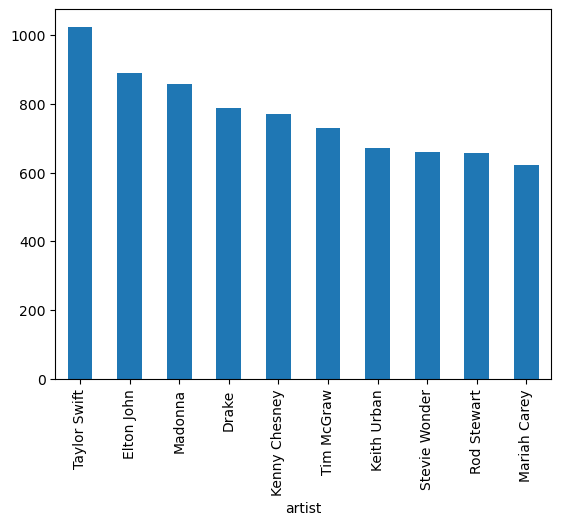

In [76]:
music["artist"].value_counts().head(10).plot(kind = "bar")

In [80]:
first = music["rank"] == 1
music[first]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
100,2021-10-30,1,Easy On Me,Adele,68.0,1,2
200,2021-10-23,1,Industry Baby,Lil Nas X & Jack Harlow,2.0,1,12
300,2021-10-16,1,Stay,The Kid LAROI & Justin Bieber,2.0,1,13
400,2021-10-09,1,My Universe,Coldplay x BTS,NaN,1,1
...,...,...,...,...,...,...,...
329587,1958-09-01,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,5
329687,1958-08-25,1,Little Star,The Elegants,2.0,1,4
329787,1958-08-18,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,3
329887,1958-08-11,1,Poor Little Fool,Ricky Nelson,1.0,1,2


<Axes: xlabel='artist'>

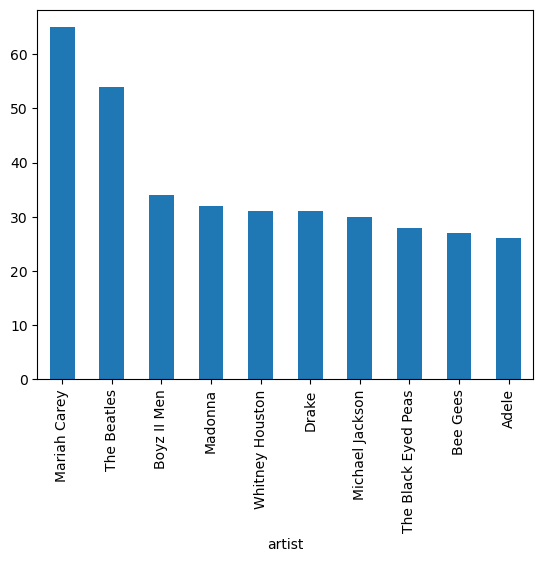

In [82]:
music[first]["artist"].value_counts().head(10).plot(kind = "bar")

In [84]:
music[first]["song"].value_counts()

song
Old Town Road                               19
Despacito                                   16
One Sweet Day                               16
Rockstar                                    15
I'll Make Love To You                       14
                                            ..
Then Came You                                1
You Haven't Done Nothin                      1
You Ain't Seen Nothing Yet/Free Wheelin'     1
Whatever Gets You Thru The Night             1
I'll Take You There                          1
Name: count, Length: 1104, dtype: int64

<Axes: >

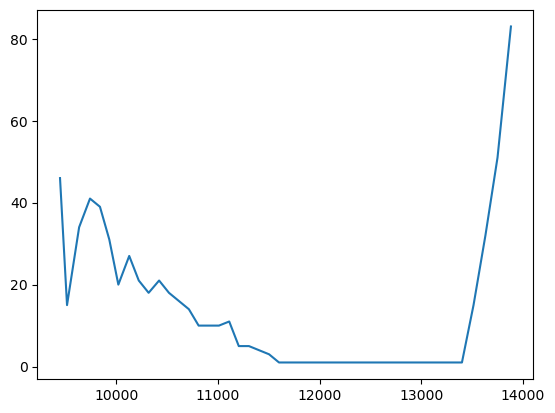

In [87]:
music[music["song"] == "Old Town Road"]["rank"].plot()

这张图是以序号作为横坐标的。

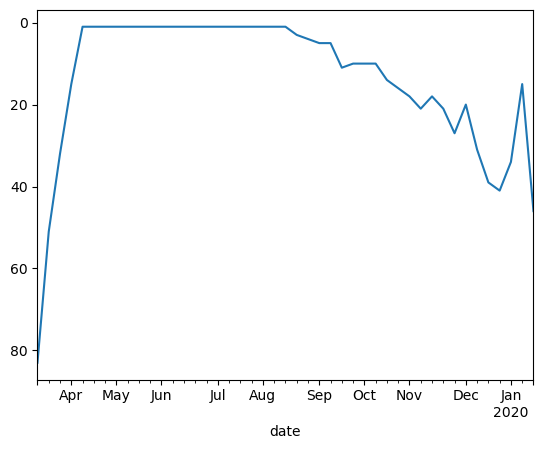

In [96]:
trend = music[music["song"] == "Old Town Road"].set_index("date")["rank"].plot().invert_yaxis()

`invert_yaxis()` 把纵坐标倒置。Set the y axis from large to small.